In [148]:
import pandas as pd
import numpy as np

In [149]:
df=pd.read_csv('train.csv')

In [150]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
df.Survived.nunique()

2

In [153]:
df['Survived'] = df['Survived'].astype('category')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


In [155]:
df.Sex.nunique()

2

In [156]:
df['Sex'] = df['Sex'].astype('category')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 71.7+ KB


In [158]:
df['Pclass'] = pd.Categorical(df['Pclass'], categories=[3, 2, 1], ordered=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.8+ KB


In [160]:
decimal_entries = df[df['Age'] % 1 != 0]

In [161]:
print("Total entries with decimals:", len(decimal_entries))

Total entries with decimals: 202


In [162]:
df['Embarked'] = df['Embarked'].astype('category')

In [163]:
from scipy.stats import skew

# Assuming df is your DataFrame and 'age' is the column you want to check
age_skewness = skew(df['Age'].dropna())
print("Skewness of the age column:", age_skewness)

Skewness of the age column: 0.3882898514698657


In [164]:
# Impute null age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


In [166]:
new_skewness = skew(df['Age'].dropna())
print("Skewness after imputation or deletion:", new_skewness)

Skewness after imputation or deletion: 0.5093852558219663


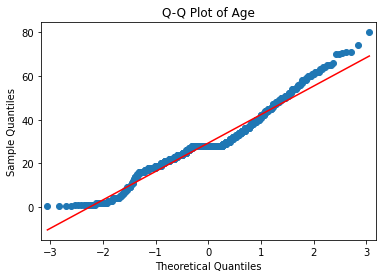

In [167]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'age' is the column you want to check
sm.qqplot(df['Age'].dropna(), line='s')
plt.title('Q-Q Plot of Age')
plt.show()

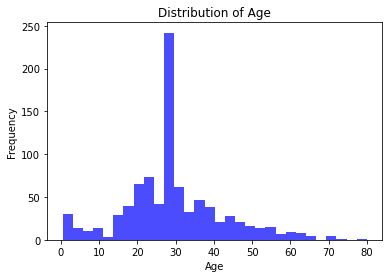

In [168]:
plt.hist(df['Age'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [169]:
df = df.drop('Cabin', axis=1).reset_index(drop=True)

In [170]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [171]:
df = df.dropna().reset_index(drop=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.7+ KB


In [173]:
df1=df.copy()

In [174]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [175]:
import sklearn.utils
df = sklearn.utils.shuffle(df)
df = df.reset_index(drop= True )
df.shape


(889, 11)

In [176]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [177]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [178]:
df = df.drop(columns=['Name' , 'Ticket' , 'Embarked','PassengerId'])

In [179]:
X = df.drop(columns= 'Survived' )
y = df[ 'Survived' ]

In [180]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Pclass  889 non-null    category
 1   Sex     889 non-null    category
 2   Age     889 non-null    float64 
 3   SibSp   889 non-null    int64   
 4   Parch   889 non-null    int64   
 5   Fare    889 non-null    float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 29.9 KB


In [181]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 , random_state= 0 )
y_train.value_counts()

0    382
1    240
Name: Survived, dtype: int64

In [182]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.Sex = encoder.fit_transform(x_train.Sex)
x_test.Sex = encoder.transform(x_test.Sex)
print(x_test.Sex.value_counts())

1    170
0     97
Name: Sex, dtype: int64


In [183]:
print(x_train.isnull().sum())

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [184]:
from imblearn.over_sampling import SMOTENC


smotenc = SMOTENC(sampling_strategy='auto', categorical_features=[0,1])
x_train_balanced, y_train_balanced = smotenc.fit_resample(x_train, y_train)

In [185]:
print(x_train_balanced.isnull().sum())

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [186]:
x_train_balanced

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,25.000000,1,0,7.775000
1,2,0,25.000000,1,1,30.000000
2,1,1,40.000000,0,0,31.000000
3,3,1,19.000000,0,0,7.895800
4,3,0,23.000000,0,0,7.550000
...,...,...,...,...,...,...
759,3,1,19.329190,0,0,7.959473
760,1,1,44.443684,0,0,26.501322
761,2,1,3.393699,4,2,31.387500
762,1,1,26.090411,0,0,30.248630


In [187]:
y_train_balanced

0      1
1      1
2      1
3      0
4      1
      ..
759    1
760    1
761    1
762    1
763    1
Name: Survived, Length: 764, dtype: category
Categories (2, int64): [0, 1]

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_balanced[['Age','Fare']] = scaler.fit_transform(x_train_balanced[['Age','Fare']])

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_test[['Age', 'Fare']] = scaler.fit_transform(x_test[['Age', 'Fare']])

In [190]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
model.fit(x_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [191]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
new_predictions = model.predict(x_test)
new_predictions

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [192]:
conf_matrix = confusion_matrix(y_test, new_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[149  18]
 [ 35  65]]


In [193]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 80


In [94]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
model=log_reg.fit(x_train_balanced, y_train_balanced)

In [97]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
new_predictions = model.predict(x_test)
new_predictions

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [98]:
conf_matrix = confusion_matrix(y_test, new_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[130  30]
 [ 26  81]]


In [194]:
df_test=pd.read_csv('test.csv')

In [195]:
import pandas as pd

def preprocess_dataset(input_data, columns_to_remove=[], columns_to_convert_categorical=[], columns_to_replace_nan=[], ordered_categorical_columns=[]):
    """
    Preprocess the dataset by removing specified columns, converting certain columns to categorical data types,
    replacing NaN values in specified columns with their respective median values,
    and changing specified columns to ordered categorical data types.

    Parameters:
    - input_data (pd.DataFrame): The input dataset.
    - columns_to_remove (list): List of column names to be removed.
    - columns_to_convert_categorical (list): List of column names to be converted to categorical data types.
    - columns_to_replace_nan (list): List of column names to replace NaN values with their respective median values.
    - ordered_categorical_columns (list): List of column names to change to ordered categorical data types.

    Returns:
    - pd.DataFrame: The preprocessed dataset.
    """

    # Make a copy of the input dataset to avoid modifying the original data
    processed_data = input_data.copy()

    # Remove specified columns
    processed_data = processed_data.drop(columns=columns_to_remove, errors='ignore')

    # Convert specified columns to categorical data types
    for column in columns_to_convert_categorical:
        if column in processed_data.columns and processed_data[column].dtype == 'object':
            processed_data[column] = processed_data[column].astype('category')

    # Replace NaN values with median values in specified columns
    for column in columns_to_replace_nan:
        if column in processed_data.columns and processed_data[column].dtype in ['int64', 'float64']:
            median_value = processed_data[column].median()
            processed_data[column] = processed_data[column].fillna(median_value)

    # Change specified columns to ordered categorical data types
    for column in ordered_categorical_columns:
        if column in processed_data.columns and processed_data[column].dtype == 'int64':
            processed_data[column] = pd.Categorical(processed_data[column], categories=[3, 2, 1], ordered=True)

    return processed_data

# Example usage:
# Assuming 'df' is your dataset, 'columns_to_remove' contains columns to be removed,
# 'columns_to_convert_categorical' contains columns to be converted to categorical,
# 'columns_to_replace_nan' contains columns to replace NaN with median values,
# and 'ordered_categorical_columns' contains columns to change to ordered categorical data types.


In [196]:
df_processed = preprocess_dataset(
    df_test,
    columns_to_remove=['Name' , 'Ticket' , 'Embarked','PassengerId','Cabin'],
    columns_to_convert_categorical=['Sex'],
    columns_to_replace_nan=['Age'],
    ordered_categorical_columns=['Pclass']
)


In [197]:
df_processed

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,27.0,0,0,8.0500


In [198]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Pclass  418 non-null    category
 1   Sex     418 non-null    category
 2   Age     418 non-null    float64 
 3   SibSp   418 non-null    int64   
 4   Parch   418 non-null    int64   
 5   Fare    417 non-null    float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 14.3 KB


In [199]:
df_processed['Fare'].fillna(df_processed['Fare'].median(), inplace=True)

In [200]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_processed.Sex = encoder.fit_transform(df_processed.Sex)
print(df_processed.Sex.value_counts())

1    266
0    152
Name: Sex, dtype: int64


In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_processed[['Age', 'Fare']] = scaler.fit_transform(df_processed[['Age', 'Fare']])

In [202]:
new_predictions_1 = model.predict(df_processed)

In [203]:
df_test['new_predictions_1']=new_predictions_1

In [204]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_predictions_1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [205]:
k=['PassengerId','new_predictions_1']
submit= df_test[k]

In [206]:
submit

,PassengerId,new_predictions_1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [207]:
submit.to_csv('final_model_2pred.csv', index=False)

In [208]:
submit

,PassengerId,new_predictions_1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [211]:
new_column_names = {'new_predictions_2': 'Survived'}
submit = submit.rename(columns=new_column_names)

In [212]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [213]:
df2=pd.read_csv('final_model_2pred.csv')

In [214]:
df2

,PassengerId,new_predictions_1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [218]:
new_column_names = {'new_predictions_1': 'Survived'}
df2 = df2.rename(columns=new_column_names)

In [220]:
df2.to_csv('final_model_4pred.csv', index=False)

In [219]:
df2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
